# Fitting a model to data

A walkthrough of the exercises in the paper ['Data analysis recipes: fitting a model to data'](https://arxiv.org/abs/1008.4686).

In [36]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

Initializing the data that we will use:

In [37]:

x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
sigma_x = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5])
rho_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.3, -0.46, -0.03, 0.5, 0.73, -0.52, 0.9, 0.4, -0.78, -0.56])

## Exercise 1

*Using the standard linear algebra method of this Section, fit
the straight line $y = mx + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $\sigma^2_m$ on the slope of
the line?*

y = (2.24 +- 0.11)x + 34 +- 18


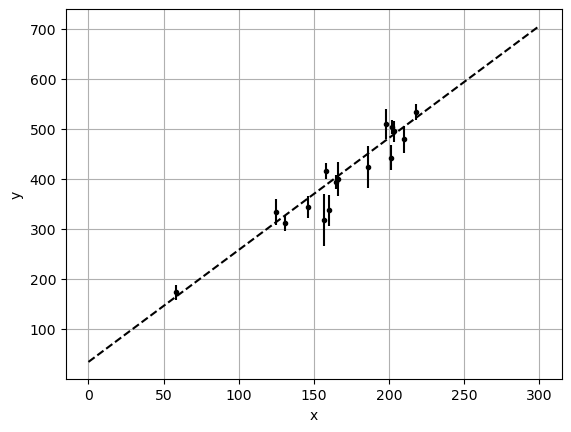

In [42]:
xlim = [0, 300]

def least_squares(x, y, sigma_y):
    A = np.vander(x, 2)
    inv_cov = np.diag(1 / sigma_y ** 2)
    A_reduced_dim = A.T @ inv_cov @ A
    param_cov = np.linalg.inv(A_reduced_dim)
    m, b = np.linalg.solve(A_reduced_dim, A.T @ inv_cov @ y)
    return m, b, np.sqrt(param_cov[0, 0]), np.sqrt(param_cov[1, 1])

m, b, sigma_m, sigma_b = least_squares(x[4:], y[4:], sigma_y[4:])

x_fit = np.linspace(*xlim, 1000)
y_fit = b + m * x_fit
print("y = ({:.2f} +- {:.2f})x + {:.0f} +- {:.0f}".format(m, sigma_m, b, sigma_b))
plt.errorbar(x[4:], y[4:], yerr=sigma_y[4:], fmt=".k")
plt.plot(x_fit, y_fit, ls='--', c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 2

*Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance $\sigma^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?*

y = (1.08 +- 0.08)x + 213 +- 14


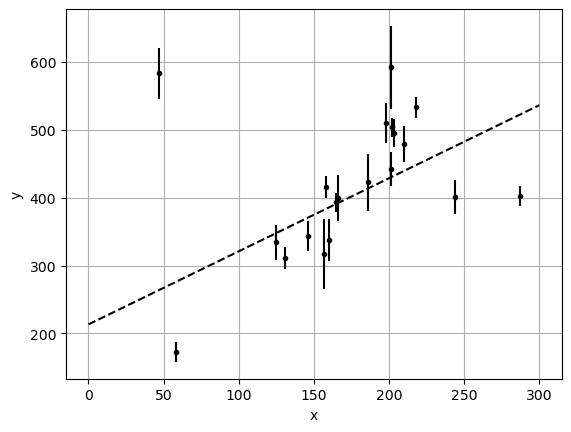

In [41]:
m, b, sigma_m, sigma_b = least_squares(x, y, sigma_y)
y_fit = b + m * x_fit
print("y = ({:.2f} +- {:.2f})x + {:.0f} +- {:.0f}".format(m, sigma_m, b, sigma_b))
plt.errorbar(x, y, yerr=sigma_y, fmt=".k")
plt.plot(x_fit, y_fit, ls='--', c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()